In [ ]:
# Creator: Mary Newby
# Special Thanks to: Professor Hansen for a delightful semester in Time Series Analysis and Forecasting
# Also Thanks to the Kaggle community, specifically 

In [51]:
# imports appropriate libraries and data into dataframes
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# calendar_df displays special events as dummy variables, with date, wm_yr_wk, weekday, wday, month, year
calendar_df = pd.read_csv(r'C:\Users\19199\Downloads\calendar.csv')
# contains 5 rows, one for each of the first 5 item and unit demand for each day, total days = 1913, used for validation
sales = pd.read_csv(r'C:\Users\19199\Downloads\sales_train_validation.csv')
# example formating for sample submission
submission = pd.read_csv(r'C:\Users\19199\Downloads\sample_submission.csv')
# sell_prices displays sell prices per store_id, item_id, wm_yr_wk(week)
sell_prices_df = pd.read_csv(r'C:\Users\19199\Downloads\sell_prices.csv')

In [88]:
F3 = sales[sales['id'] == 'FOODS_3_150_TX_1_validation']
F1 = sales[sales['id'] == 'FOODS_1_170_CA_3_validation']
HH = sales[sales['id'] == 'HOUSEHOLD_2_399_CA_3_validation']

In [53]:
# attributed to https://www.kaggle.com/arjunsehajpal/m5-forecasting-initialeda
def reduce_mem_usage(df, verbose=True):
    """
    reduces the mem usage by performing certain coercion operations
    inp: dataframe,
         verbose (whether to print the info regarding mem reduction or Not)
    returns: dataframe
    """
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [89]:
item_size = 100

NUM_ITEMS = 1 # 30490
DAYS_PRED = submission.shape[1] - 1

def explanatory_variables(df):
    
    df['ex1'] = df['snap_CA'] + df['snap_TX'] + df['snap_WI']
    df['ex2'] = 1 * (pd.notnull(df['event_name_1']) | pd.notnull(df['event_name_2']))

    return df

calendar_df = reduce_mem_usage(explanatory_variables(calendar_df))
submission = reduce_mem_usage(submission)
sell_prices_df = reduce_mem_usage(sell_prices_df)

nrows = 2 * 365 * NUM_ITEMS

DAYS_PRED = submission.shape[1] - 1

# converting the df from wide to long


Mem. usage decreased to  0.13 Mb (4.3% reduction)
Mem. usage decreased to  2.09 Mb (0.0% reduction)
Mem. usage decreased to 130.48 Mb (0.0% reduction)


In [90]:
def prep(df):
    df = pd.melt(df, 
                         id_vars = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], 
                                     var_name = 'day', value_name = 'demand')
    df = df.iloc[-nrows:,:]
    dfl = df.day.values.tolist()
    for i in dfl:
        i = int(i[2:])
    df.drop('day', axis = 1, inplace = True)
    df['day'] = dfl
    return df

F1 = prep(F1)
F3 = prep(F3)
HH = prep(HH)

item_size = 100

NUM_ITEMS = 1 # 30490
DAYS_PRED = submission.shape[1] - 1
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import matplotlib.pyplot as plt

def seriesplot(s):
    s = s['demand']
    s = s.reset_index(drop=True)
    plt.plot(s)
    plt.show()
    return s

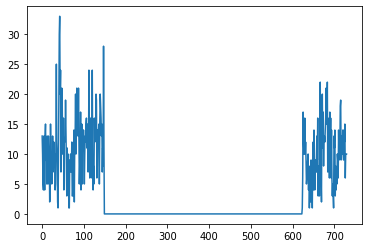

In [91]:
F3 = seriesplot(F3)

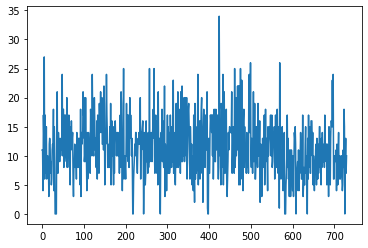

In [92]:
F1 = seriesplot(F1)

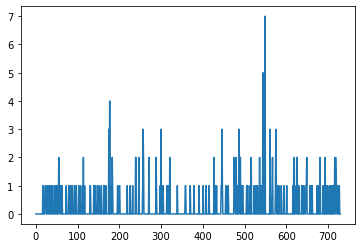

In [93]:
HH = seriesplot(HH)

In [94]:
# Simple Exponential Smoothing

def newSES(s, length):
    fit1 = SimpleExpSmoothing(s).fit(smoothing_level=0.2,optimized=False)
    fcast1 = fit1.forecast(12).rename(r'$\alpha=0.2$')
    fcast1.plot(marker='o', color='blue', legend=True)
    fit1.fittedvalues.plot(marker='o',  color='blue')



    fit2 = SimpleExpSmoothing(s).fit(smoothing_level=0.6,optimized=False)
    fcast2 = fit2.forecast(12).rename(r'$\alpha=0.6$')

    fcast2.plot(marker='o', color='red', legend=True)
    fit2.fittedvalues.plot(marker='o', color='red')


    fit3 = SimpleExpSmoothing(s).fit()
    fcast3 = fit3.forecast(12).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

    fcast3.plot(marker='o', color='green', legend=True)
    fit3.fittedvalues.plot(marker='o', color='green')

    ax = plt.gca()
    ax.set_xlim([0,length])

    plt.show()
    return fcast3

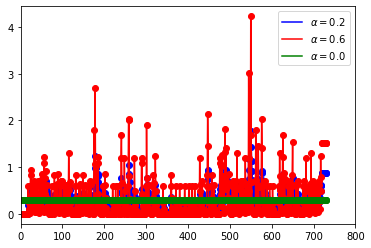

0.28749995381857574


In [95]:
HH_SES = newSES(HH[:720],800)
print (HH_SES[720])

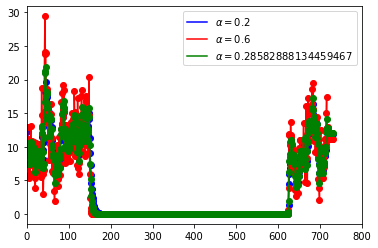

12.034437696340776


In [96]:
F3_SES = newSES(F3[:720],800)
print (F3_SES[720])

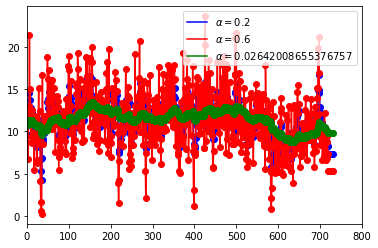

9.833298004782911


In [97]:
F1_SES = newSES(F1[:720],800)
print (F1_SES[720])

In [98]:
def intervals(ts):
    y = np.zeros(len(ts))
    k = 0
    counter = 0
    for tmp in range(len(ts)):
        if(ts[tmp]==0):
            counter = counter + 1
        else:
            k = k + 1
            y[k] = counter
            counter = 1
    y = np.array(y)
    y[np.isnan(y)] = 1
    y = y[y > 0]
    return y

In [99]:
def Crostons(ts):
    n = []
    a = []
    k = 0
    for i in ts: 
        k += 1
        if i > 0:
            n.append(i)
            a.append(k)
            k = 0
            
    n = pd.DataFrame(n)
    a = pd.DataFrame(a)
    n = n.reset_index(drop=True)
    a = a.reset_index(drop=True)
    dmodel = newSES(n,200)
    imodel = newSES(a,200)
    return dmodel,imodel

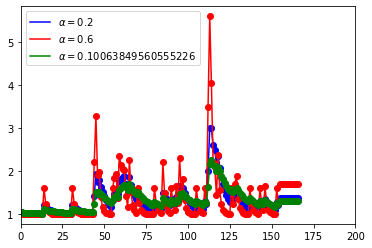

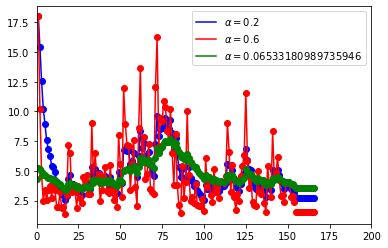

1.3024250351164857
3.5597404359185307
0.36587640547460787


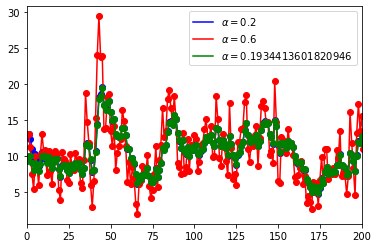

C:\Users\19199\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


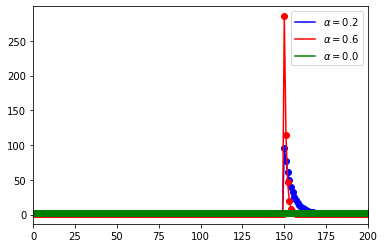

10.633895530452957
2.851775420405435
3.7288684986776217


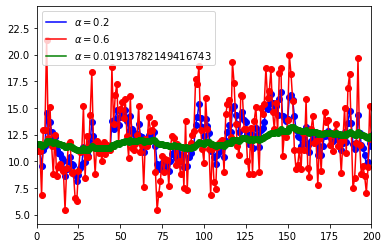

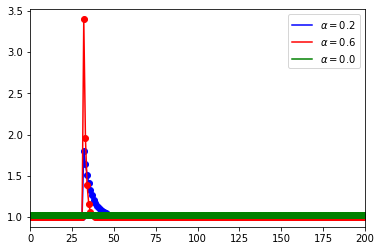

10.127437036660742
1.0224089911259586
9.905465547116911


In [111]:
HH_d,HH_i = Crostons(HH[:720])
print (HH_d[158])
print (HH_i[158])
HH_pre = HH_d[158]/HH_i[158]
print (HH_pre)
F3_d,F3_i = Crostons(F3)
print (F3_d[256])
print (F3_i[256])
F3_pre = F3_d[256]/F3_i[256]
print (F3_pre)
F1_d,F1_i = Crostons(F1)
print (F1_d[714])
print (F1_i[714])
F1_pre = F1_d[714]/F1_i[714]
print (F1_pre)

In [118]:
import math


    
def validation(data,pred):
    demand = data[:720]
    demand_t = data[720:]
    h = len(demand_t.index)
    n = len(demand.index)
    a = []
    b = []
    demand_t_n = demand_t.values.tolist()
    demand_n = demand.values.tolist()
    
    for i in range(n):
        if i != 0 and i !=(n-1):
            a.append(((demand_n[i]-demand_n[i-1])**2))
    a_sum = sum(a)
    
    for i in range(h):
        b.append(((demand_t_n[i]-pred)**2))
    
    b_sum = sum(b)
    
    cal = math.sqrt(b_sum*(n-1)/(h*a_sum))
    
    
    
    return cal

print (validation(HH,HH_SES[720]))
print (validation(HH,HH_pre))
print (validation(F1,F1_SES[720]))
print (validation(F1,F1_pre))
print (validation(F3,F3_SES[720]))
print (validation(F3,F3_pre))

0.49487215673088325
0.4997734411734406
0.6822557642827627
0.6826086392159953
0.7208411389205992
1.9848430494847336
